181
english german


(-1.0, 192.0)

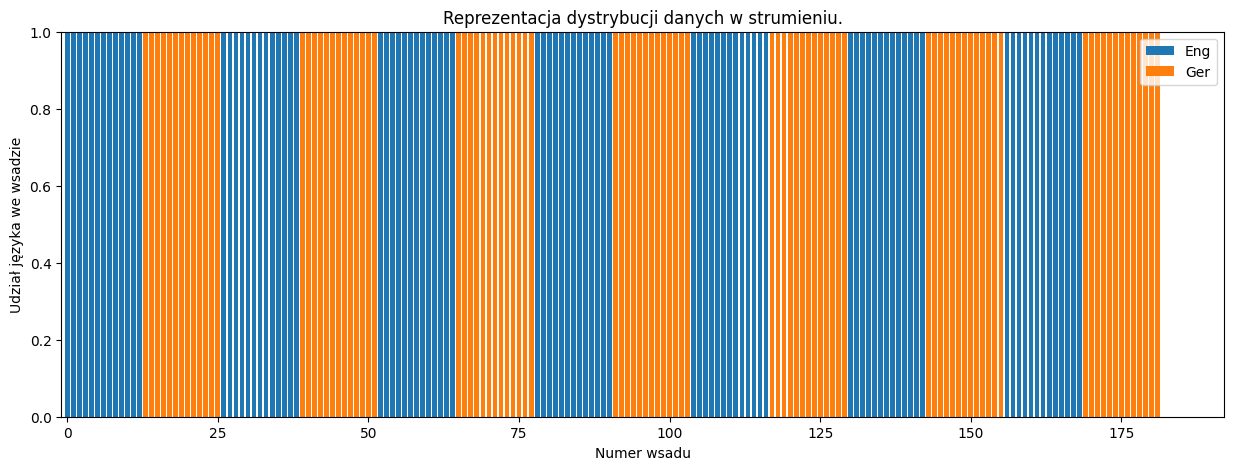

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
name = "english_german_sudden"
data = pd.read_csv(f"{name}.csv").set_index("index")
print(data.batch_index.max())
lang_1, lang_2 = data["language"].unique().tolist()
print(lang_1, lang_2)
tmp = data[["language", "batch_index"]]
tmp.loc[tmp["language"] == lang_1, "language"] = 1
tmp.loc[tmp["language"] == lang_2, "language"] = 0
y = tmp.groupby("batch_index").mean().to_numpy()
y = y[:,0]
fig, ax = plt.subplots(figsize=(15,5))

x = np.arange(len(y))
x = np.linspace(0, len(y)-1, len(y))
second = np.ones(len(y)) - y
ax.bar(x, y, label=lang_1[:3].title())
ax.bar(x, second, bottom=y,
       label=lang_2[:3].title())

ax.set_ylabel('Udział języka we wsadzie')
ax.set_xlabel('Numer wsadu')
ax.set_title(f'Reprezentacja dystrybucji danych w strumieniu.')
ax.legend()
ax.set_xlim([-1,192])

In [1]:
import pandas as pd

pd.read_parquet("/Users/hulewicz/Private/fake-news-detection/streaming_approach/embeddings.parquet")

,embeddings
0,0.364456
1,-1.060148
2,-0.209860
3,0.061410
4,-0.032842
...,...
763,0.367069
764,1.004125
765,-0.916993
766,0.578649


In [3]:
import pandas as pd
data = pd.read_csv("english_german_combined.csv", index_col=0)
data.fake.value_counts()

fake
0    15387
1    14922
Name: count, dtype: int64

In [6]:
data.text.apply(lambda x: len(x.split(" "))).describe()

count    30309.000000
mean       609.413936
std        745.591293
min          1.000000
25%        223.000000
50%        378.000000
75%        805.000000
max      23632.000000
Name: text, dtype: float64

In [46]:
import pandas as pd

data = pd.read_csv("english_german_combined.csv", index_col=0).reset_index().rename(columns={"index": "old_index"})
data["length"] = data.text.apply(lambda x: len(x.split(" ")))
print(data.shape)
print(data["language"].value_counts())
reduced = data[data["length"] < 1407].copy()
# reduced = data.copy()
reduced = reduced[reduced["length"] >= 2].sort_values("length")
reduced.drop_duplicates(subset="text", inplace=True)
reduced["length"].describe()
print(reduced["fake"].value_counts())
print(reduced["language"].value_counts())
reduced.drop("length", axis=1,  inplace=True)
reduced = reduced.reset_index(drop=True).reset_index().rename(columns={"index": "new_index"})
reduced.to_csv("english_german_combined_REDUCED.csv", index=False)

(30309, 5)
language
english    20684
german      9625
Name: count, dtype: int64
fake
0    14087
1    13629
Name: count, dtype: int64
language
english    18091
german      9625
Name: count, dtype: int64


In [50]:
data2 = pd.read_csv("english_german_incremental_vmild.csv")
data2

,index,text,fake,language,batch_index
0,11447,"Russia Vitaly Churkin, the Russian ambassador ...",1,english,0
1,16831,"Posted on October 31, 2016 by Dr. Eowyn | 2 Co...",1,english,0
2,505,Smoking will be prohibited in public housing r...,0,english,0
3,4036,"By George ZapoPosted Friday, October 28, 2016 ...",1,english,0
4,13052,"Hate Rising with Jorge Ramos Fusion, October 2...",1,english,0
...,...,...,...,...,...
19188,26803,Dramatische Szenen spielten sich bei einem Bra...,0,german,191
19189,21641,Sein umstrittener Jubel wird wohl ein Nachspie...,1,german,191
19190,28079,"Zusammenfügen und Eigenschaften mit ""lebenden ...",0,german,191
19191,23249,In einem Spiellokal in Wien-Margareten können ...,1,german,191


In [2]:
import pyarrow.parquet as pq
import pandas as pd

pd.read_csv("english_german_combined_REDUCED.csv").to_parquet("english_german_combined.parquet")

In [3]:

pq.read_table("english_german_combined.parquet")

pyarrow.Table
new_index: int64
old_index: int64
text: string
fake: int64
language: string
----
new_index: [[0,1,2,3,4,...,27711,27712,27713,27714,27715]]
old_index: [[3357,5391,775,2088,3941,...,15491,28662,15395,887,11252]]
text: [["Guest Guest","In obamaland...","David Swanson","Racist drivel.","HE KNEW",...,"DELAWARE, Ohio— Donald J. Trump is not popular in this prospering county north of Columbus. The Republican nominee’s dystopian language does not resonate here. Signs that read “Now Hiring” outnumber “Trump” campaign placards. But many residents of this reliably Republican county, which last voted for a Democratic president in 1916, simply cannot imagine voting for Mr. Trump’s Democratic opponent, Hillary Clinton. And that goes a long way toward explaining why she has struggled to separate herself from Mr. Trump in this bellwether state. “I just don’t know what I’m going to do,” said Anne Merrels, 48, who lives with her family in Powell, an old farming town that has sprouted a pa